# Data Set Building For Hidden Correlation Discovery

In [38]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
df = pd.read_csv('col_bus_sub_wifi.csv', header=None, sep=',')
df[[2,5,6,7]].head(1)

,2,5,6,7
0,0,0,0,0


### Features:
### 2 is number of deaths (target variable)
### 5 is presence of bus stop within 25 meters to the collision location
### 6 is presence of subway entrance within 25 meters to the collision location
### 7 is presence of Lynk Wifi spot within 25 meters to the collision location

In [39]:
split = np.random.rand(len(df[[2,5,6,7]])) < .8
train = df[[2,5,6,7]][split]
test = df[[2,5,6,7]][~split]

## Decision Tree

In [40]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train.drop(2,1), train[[2]])

### AUC Plot:

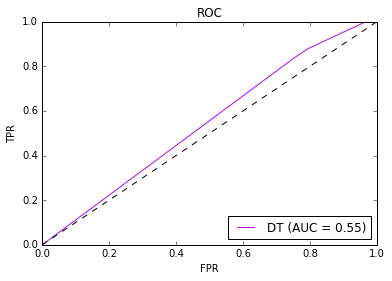

In [41]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline
def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

plotAUC(test[[2]], clf.predict_proba(test[[5,6,7]])[:,1], 'DT')  

plt.show()

### Feature Importance:

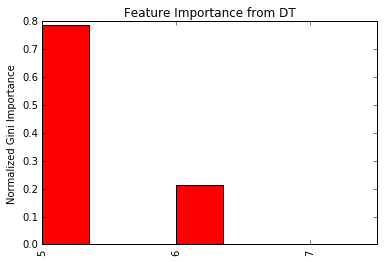

In [42]:
fig, ax = plt.subplots()
width=0.35
#ax.bar(train.drop(lab,1).columns.values, clf.feature_importances_, width, color='r')
ax.bar(np.arange(3), clf.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(train.drop(2,1).columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', n_estimators=500)
rf = rf.fit(train.drop(2, 1), train[2])
rf_pred = rf.predict_proba(test.drop(2,1))

### AUC Plot:

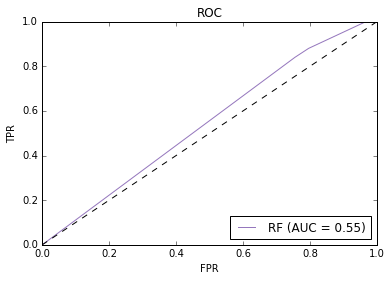

In [44]:
plotAUC(test[[2]], rf_pred[:,1], 'RF')  

plt.show()

### Feature Importance:

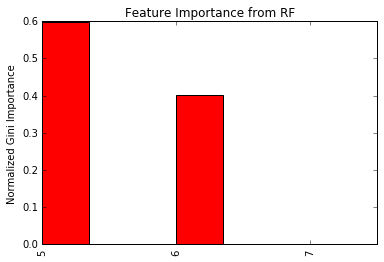

In [45]:
fig, ax = plt.subplots()
width=0.35
#ax.bar(train.drop(lab,1).columns.values, clf.feature_importances_, width, color='r')
ax.bar(np.arange(3), rf.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(train.drop(2,1).columns.values,rotation=90)
plt.title('Feature Importance from RF')
ax.set_ylabel('Normalized Gini Importance')